In [1]:
import pandas as pd

path = '/Users/alexander/Downloads/single_check.xlsx'

df = pd.read_excel(path)

In [2]:
df.head()

,architecture,model,reasoning,query,status,debugger,dataflow,debug_itr,errors_total,errors_validation,...,total_netto_input_tokens,log_path,filepath,test_name,user_request,sql_query,output_test,output_act,evaluation,comment
0,Multi,gpt-5-mini,medium,Create a plan that outputs all active organisa...,Sucessful.,False,"['Query', 'SpecifierAgent', 'SelectorAgent', '...",0,0,0,...,27055,/Users/alexander/VSC_local/Wayang/AI_Wayang_Te...,/Users/alexander/Wayang_Data/Output/output_202...,t1,Create a plan that outputs all active organisa...,SELECT * FROM organisation WHERE active_organi...,"[{'line': 1, 'data': '1 | 1 | 1 | Asminderød B...","[{'line': 1, 'data': 'organisation_id,organisa...",Correct,NaN
1,Multi,gpt-5-mini,medium,Make a Wayang Plan that based on tenancy types...,Sucessful.,True,"['Query', 'SpecifierAgent', 'SelectorAgent', '...",0,0,0,...,17363,/Users/alexander/VSC_local/Wayang/AI_Wayang_Te...,/Users/alexander/Wayang_Data/Output/output_202...,t6,Make a Wayang Plan that based on tenancy types...,"SELECT \n t.tenancy_types_id,\n t.tenanc...","[{'line': 1, 'data': '1 | Etagebolig | 3999'},...","[{'line': 1, 'data': 'tenancy_types_id,tenancy...",Correct,NaN
2,Multi,gpt-5-mini,medium,Make a Wayang Plan that take the cities in rel...,Sucessful.,True,"['Query', 'SpecifierAgent', 'SelectorAgent', '...",1,1,0,...,12127,/Users/alexander/VSC_local/Wayang/AI_Wayang_Te...,/Users/alexander/Wayang_Data/Output/output_202...,t3,Make a Wayang Plan that take the cities in rel...,SELECT *\nFROM organisation\nWHERE municipalit...,"[{'line': 1, 'data': ""Couldn't open file""}]","[{'line': 1, 'data': 'organisation_id,organisa...",Failure,NaN
3,Multi,gpt-5-mini,medium,Make a Wayang Plan that take the cities in rel...,Unsucessful.,False,"['Query', 'SpecifierAgent', 'SelectorAgent', '...",0,1,0,...,16010,/Users/alexander/VSC_local/Wayang/AI_Wayang_Te...,/Users/alexander/Wayang_Data/Output/output_202...,t3,Make a Wayang Plan that take the cities in rel...,SELECT *\nFROM organisation\nWHERE municipalit...,"[{'line': 1, 'data': ""Couldn't open file""}]","[{'line': 1, 'data': 'organisation_id,organisa...",Failure,NaN
4,Multi,gpt-5-mini,medium,Make a Wayang Plan that based on tenancy types...,Sucessful.,False,"['Query', 'SpecifierAgent', 'SelectorAgent', '...",0,0,0,...,26317,/Users/alexander/VSC_local/Wayang/AI_Wayang_Te...,/Users/alexander/Wayang_Data/Output/output_202...,t6,Make a Wayang Plan that based on tenancy types...,"SELECT \n t.tenancy_types_id,\n t.tenanc...","[{'line': 1, 'data': '1,Etagebolig,225'}, {'li...","[{'line': 1, 'data': 'tenancy_types_id,tenancy...",Wrong,NaN


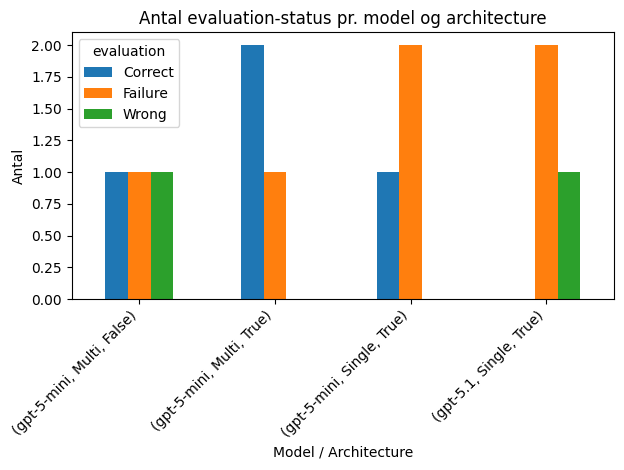

In [5]:
import matplotlib.pyplot as plt

# Gruppér efter model, architecture og evaluation
counts = df.groupby(["model", "architecture", "debugger","evaluation"]).size().reset_index(name="count")

# Lav en pivot så hver evaluation-type bliver en kolonne
pivot = counts.pivot_table(index=["model", "architecture", "debugger"],
                           columns="evaluation",
                           values="count",
                           fill_value=0)

# Plot
pivot.plot(kind="bar")
plt.title("Antal evaluation-status pr. model og architecture")
plt.xlabel("Model / Architecture")
plt.ylabel("Antal")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Gruppér efter model, architecture og evaluation
df2 = df.copy()
df2 = df2[df2["debugger"] == "True"]
counts = df2.groupby(["model", "architecture", "debugger","evaluation"]).size().reset_index(name="count")

# Lav en pivot så hver evaluation-type bliver en kolonne
pivot = counts.pivot_table(index=["model", "architecture", "debugger"],
                           columns="evaluation",
                           values="count",
                           fill_value=0)

# Plot
pivot.plot(kind="bar")
plt.title("Antal evaluation-status pr. model og architecture")
plt.xlabel("Model / Architecture")
plt.ylabel("Antal")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

KeyError: False